In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/content/drive/MyDrive/DL/data.csv")

In [3]:
df.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


In [4]:
df.isnull().sum()

ID                          0
Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  35953
Age                         0
dtype: int64

From above we can see there is 35953 null value in gender column.

In [5]:
df.drop(["ID"],axis=1,inplace = True)
df=df.drop(['Gender'], axis=1)
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,31
1,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,36
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,75
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,32
4,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,29


ID column is not necessory & Gender column has more than 50% null value ,so we drop them using drop function.

In [6]:
df.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Age'],
      dtype='object')

After dropping age & gender column ,now there are 10 columns remaining.

In [7]:
df.rename(columns={ 'Agency Type':'Agency_Type', 'Distribution Channel':'Distribution_Channel', 'Product Name':'Product_Name','Net Sales':'Net_Sales', 'Commision (in value)':'Commision'},inplace=True)

In [8]:
column_names = ["Agency", "Agency_Type", "Distribution_Channel","Product_Name","Duration","Destination","Net_Sales","Commision","Age","Claim"]
df = df.reindex(columns=column_names)

There is space between 2 words of all columns, we rename & orderized them.

In [9]:
df.head()

,Agency,Agency_Type,Distribution_Channel,Product_Name,Duration,Destination,Net_Sales,Commision,Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,7,MALAYSIA,0.0,17.82,31,0
1,EPX,Travel Agency,Online,Cancellation Plan,85,SINGAPORE,69.0,0.00,36,0
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,11,MALAYSIA,19.8,11.88,75,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,16,INDONESIA,20.0,0.00,32,0
4,EPX,Travel Agency,Online,Cancellation Plan,10,"KOREA, REPUBLIC OF",15.0,0.00,29,0


In [10]:
df.shape

(50553, 10)

Now,dataset has 50553 rows & 10 columns.

In [11]:
df.isnull().sum()

Agency                  0
Agency_Type             0
Distribution_Channel    0
Product_Name            0
Duration                0
Destination             0
Net_Sales               0
Commision               0
Age                     0
Claim                   0
dtype: int64

Here, we can see there is no null values in all columns.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                50553 non-null  object 
 1   Agency_Type           50553 non-null  object 
 2   Distribution_Channel  50553 non-null  object 
 3   Product_Name          50553 non-null  object 
 4   Duration              50553 non-null  int64  
 5   Destination           50553 non-null  object 
 6   Net_Sales             50553 non-null  float64
 7   Commision             50553 non-null  float64
 8   Age                   50553 non-null  int64  
 9   Claim                 50553 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 3.9+ MB


In [13]:
column_keys=df.select_dtypes(include=['object']).columns.tolist()
for key in column_keys:
    print('Unique elements of',key,'are: ')
    print(df[key].unique(),end='\n')
    print(end='\n')

Unique elements of Agency are: 
['CWT' 'EPX' 'JZI' 'C2B' 'SSI' 'CSR' 'KML' 'RAB' 'ADM' 'JWT' 'LWC' 'TST'
 'ART' 'TTW' 'CBH' 'CCR']

Unique elements of Agency_Type are: 
['Travel Agency' 'Airlines']

Unique elements of Distribution_Channel are: 
['Online' 'Offline']

Unique elements of Product_Name are: 
['Rental Vehicle Excess Insurance' 'Cancellation Plan'
 '2 way Comprehensive Plan' 'Value Plan' 'Basic Plan' 'Bronze Plan'
 'Ticket Protector' '1 way Comprehensive Plan' 'Comprehensive Plan'
 'Silver Plan' 'Premier Plan' 'Annual Silver Plan' 'Annual Gold Plan'
 'Single Trip Travel Protect Silver' 'Travel Cruise Protect' '24 Protect'
 'Annual Travel Protect Gold' 'Single Trip Travel Protect Platinum'
 'Single Trip Travel Protect Gold' 'Spouse or Parents Comprehensive Plan'
 'Gold Plan' 'Annual Travel Protect Silver'
 'Individual Comprehensive Plan' 'Annual Travel Protect Platinum'
 'Child Comprehensive Plan']

Unique elements of Destination are: 
['MALAYSIA' 'SINGAPORE' 'INDONESIA' 'KORE

From above we seperate all unique values from categorical columns.

In [14]:
df.describe()

,Duration,Net_Sales,Commision,Age,Claim
count,50553.000000,50553.000000,50553.00000,50553.000000,50553.000000
mean,49.425969,40.800977,9.83809,40.011236,0.014658
std,101.434647,48.899683,19.91004,14.076566,0.120180
min,-2.000000,-389.000000,0.00000,0.000000,0.000000
25%,9.000000,18.000000,0.00000,35.000000,0.000000
50%,22.000000,26.500000,0.00000,36.000000,0.000000
75%,53.000000,48.000000,11.55000,44.000000,0.000000
max,4881.000000,810.000000,283.50000,118.000000,1.000000


Here,we can see that Duration, Net_sales, commision are highly skewed.

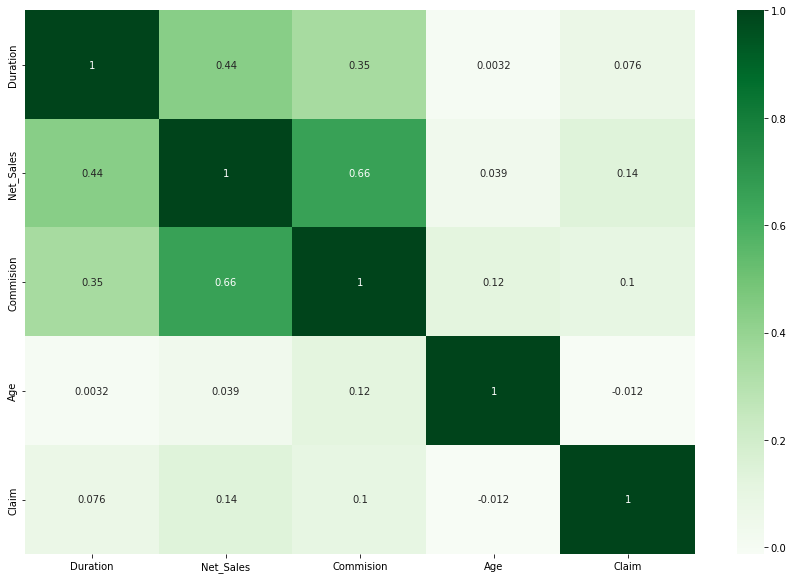

In [15]:
#Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='Greens')

Plotted the corelation coefficient to check the degree of colinearity which each individidual feature have with the output label. Clearly there is no high colinearity among any of the features.


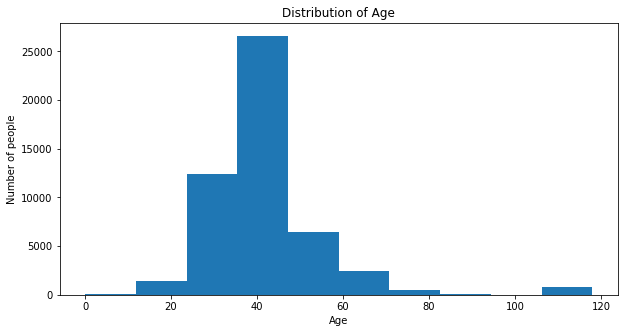

In [16]:
fig = plt.figure(figsize = (10, 5))
plt.hist(df['Age'])
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.title("Distribution of Age")
plt.show()

The above figure shows a histogram depicting the distribution of age. From the graph, the majory of people opting for travel insurance are of the age 35 to 50.


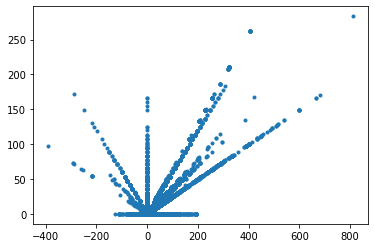

In [17]:
plt.figure()
plt.scatter(x=df['Net_Sales'],y=df['Commision'],marker='.')
plt.show()

From above graph we can see rise of commision for net sales.

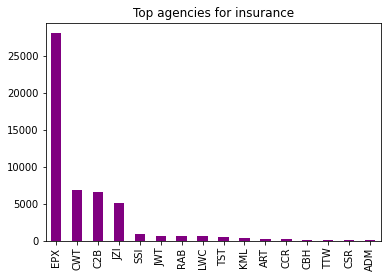

In [18]:
df['Agency'].value_counts().plot(kind='bar',color='purple')
plt.title('Top agencies for insurance')
plt.show()

From above graph we can see EPX is the top agency for insurance as compared to other agencies.

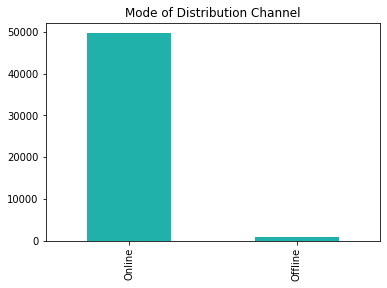

In [19]:
df['Distribution_Channel'].value_counts().plot(kind='bar',color='lightseagreen')
plt.title("Mode of Distribution Channel")
plt.show()

Here,we can see from above graph online mode opted for distribution channel.

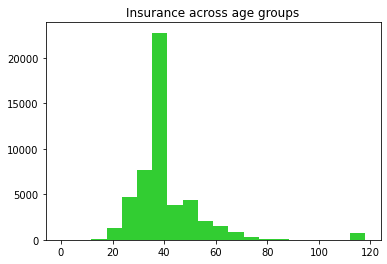

In [20]:
plt.hist(df['Age'],bins=20,color='limegreen')
plt.title("Insurance across age groups")
plt.show()

From above we can see no.of age groups for insurance.

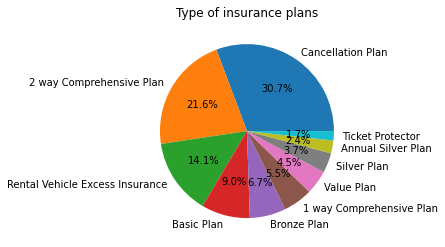

In [21]:
df1=df.groupby(by=["Product_Name"]).size().reset_index(name="counts")
df1=df1.nlargest(10,['counts'])
plt.pie(x=df1['counts'],labels=df1['Product_Name'],autopct='%1.1f%%')
plt.title('Type of insurance plans')
plt.show()

From above pie chart we can see that no of insurance plans & their counts.

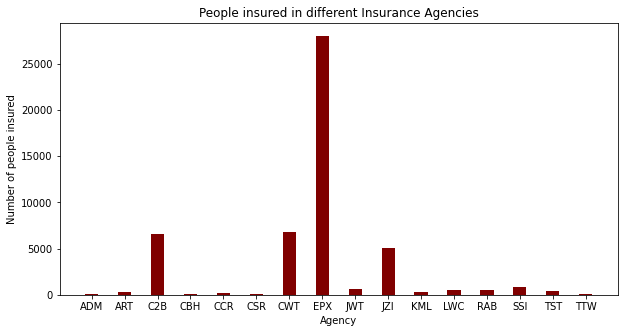

In [22]:
df2 = df.groupby(by=["Agency"]).size().reset_index(name="counts")
fig = plt.figure(figsize = (10, 5))
plt.bar(df2['Agency'], df2['counts'], color ='maroon', width = 0.4)
plt.xlabel("Agency")
plt.ylabel("Number of people insured")
plt.title("People insured in different Insurance Agencies")
plt.show()

From above graph we can see no of people insured in different insurance agencies.

In [23]:
df_num = df.select_dtypes("int64","float64")
df_cat = df.select_dtypes("object")

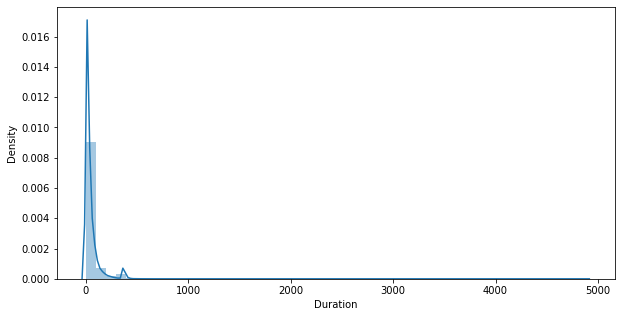

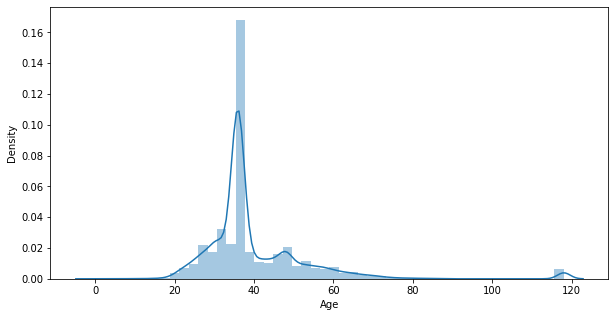

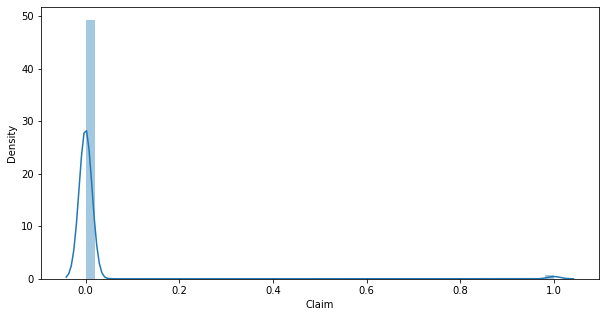

In [24]:
for col in df_num:
    plt.figure(figsize=(10,5))
    sns.distplot(df[col])
    plt.show()

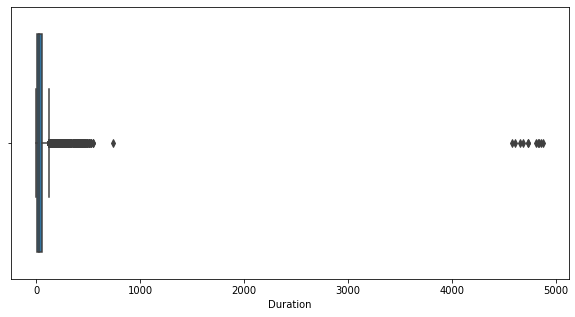

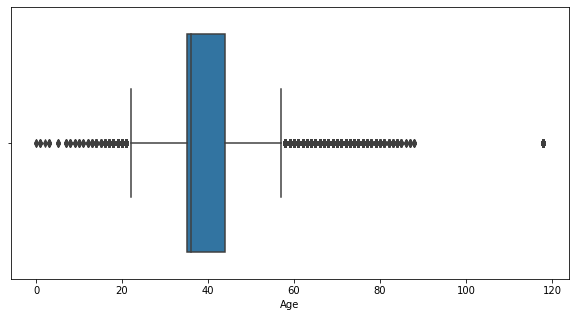

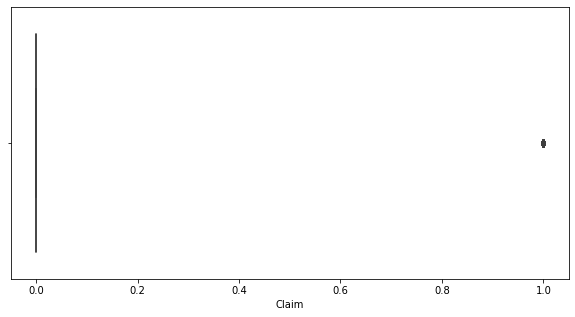

In [25]:
for col in df_num:
    plt.figure(figsize=(10,5))
    sns.boxplot(df[col])
    plt.show()

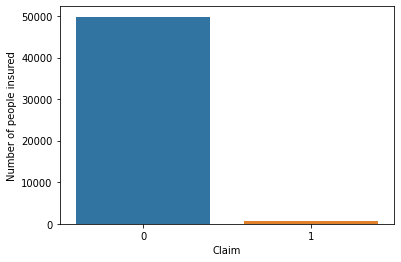

In [26]:
# target count
plt.figure()
sns.countplot(df["Claim"])
plt.xlabel("Claim")
plt.ylabel("Number of people insured")
plt.show()

Here,we can see that there are very less people's are claim for insurance.

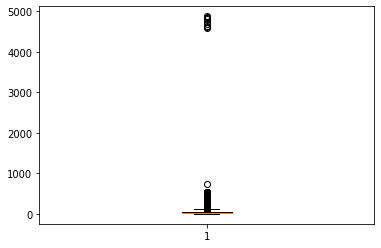

In [27]:
fig = plt.figure(figsize =(6,4 ))
plt.boxplot(df['Duration'])
plt.show()

The boxplot shows data distribution of the Duration feature. We can see that there are some outliers depicting negative values of duration i.e. Time which ideally is not possible.

In [28]:
index_duration = df[df['Duration'] < 0 ].index
df.drop(index_duration, inplace = True)

we drop negative values in Duration column

In [29]:
df.shape

(50550, 10)

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Agency']= le.fit_transform(df['Agency'])
df['Agency_Type']= le.fit_transform(df['Agency_Type'])
df['Distribution_Channel']= le.fit_transform(df['Distribution_Channel'])
df['Product_Name']= le.fit_transform(df['Product_Name'])
df['Destination']= le.fit_transform(df['Destination'])

Using label encoding we converted categorical column into the numerical columns.

In [31]:
df.head()

,Agency,Agency_Type,Distribution_Channel,Product_Name,Duration,Destination,Net_Sales,Commision,Age,Claim
0,6,1,1,16,7,56,0.0,17.82,31,0
1,7,1,1,10,85,79,69.0,0.00,36,0
2,6,1,1,16,11,56,19.8,11.88,75,0
3,7,1,1,1,16,38,20.0,0.00,32,0
4,7,1,1,10,10,47,15.0,0.00,29,0


Here we can see dataset has all numerical columns.

In [32]:
# Feature & target
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

Split Feature & target

In [33]:
#Oversampling
from imblearn.over_sampling import SMOTE 
sm=SMOTE(random_state=42)
X_sm,y_sm=sm.fit_resample(X,y)

Our dataset is highly imbalanced so,we are doing oversampling for balancing data.

In [34]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.3,random_state=1)

In [35]:
# Standardizing the Dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
y_train.value_counts()

1    35019
0    34713
Name: Claim, dtype: int64

Here,we can see our dataset is balanced now.

In [37]:
X_train.shape

(69732, 9)

In [38]:
#Neural network Architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

In [39]:
model = Sequential()
model.add(Dense(25, activation="ReLU", input_dim=9))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(20, activation="ReLU"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(20, activation="ReLU"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

In [40]:
model.compile(optimizer="adam", loss="binary_crossentropy")

In [41]:
model.fit(X_train,y_train, batch_size=128, epochs=20)

Epoch 1/20
545/545 [==============================] - 3s 3ms/step - loss: 0.5722
Epoch 2/20
545/545 [==============================] - 2s 3ms/step - loss: 0.5041
Epoch 3/20
545/545 [==============================] - 2s 3ms/step - loss: 0.4826
Epoch 4/20
545/545 [==============================] - 2s 3ms/step - loss: 0.4693
Epoch 5/20
545/545 [==============================] - 2s 3ms/step - loss: 0.4625
Epoch 6/20
545/545 [==============================] - 2s 3ms/step - loss: 0.4543
Epoch 7/20
545/545 [==============================] - 2s 3ms/step - loss: 0.4487
Epoch 8/20
545/545 [==============================] - 2s 3ms/step - loss: 0.4440
Epoch 9/20
545/545 [==============================] - 2s 3ms/step - loss: 0.4385
Epoch 10/20
545/545 [==============================] - 2s 3ms/step - loss: 0.4352
Epoch 11/20
545/545 [==============================] - 2s 3ms/step - loss: 0.4320
Epoch 12/20
545/545 [==============================] - 2s 3ms/step - loss: 0.4284
Epoch 13/20
545/545 [====

In [42]:
y_pred = model.predict(X_test)

In [43]:
y_pred = np.where(y_pred >= 0.5, 1, 0)

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84     15096
           1       0.82      0.86      0.84     14790

    accuracy                           0.84     29886
   macro avg       0.84      0.84      0.84     29886
weighted avg       0.84      0.84      0.84     29886



From above classification report we can see that we get good accuracy & recall value for insurance problem i.e.
Precision 82% , Recall 86% , F1 score 84% & Accuracy is 84%. 
So, overall we get good score for insurnce claim problem.